<a href="https://colab.research.google.com/github/gmauricio-toledo/NLP-MCD/blob/main/07-Lexicon_Based-Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Lexicon-Based Sentiment Analysis</h1>

En esta notebook realizamos análisis de sentimientos usando diccionarios predefinidos con la polaridad de ciertas palabras.

Usamos los diccionarios:

* [`opinion_lexicon`](https://www.nltk.org/_modules/nltk/corpus/reader/opinion_lexicon.html) de NLTK.
* [`MPQA`](https://mpqa.cs.pitt.edu/lexicons/subj_lexicon/).


## Approach

In [11]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk import word_tokenize
from collections import defaultdict
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

Usaremos el dataset de opiniones de IMDB.

[Más información](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).

In [2]:
!gdown 18kGdlhOiQNS61wUK7uPbdquKL3XJrgzf

Downloading...
From: https://drive.google.com/uc?id=18kGdlhOiQNS61wUK7uPbdquKL3XJrgzf
To: /content/IMDB.csv
100% 66.2M/66.2M [00:00<00:00, 68.2MB/s]


In [3]:
imdb_df = pd.read_csv('IMDB.csv')
imdb_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Las clases están balanceadas

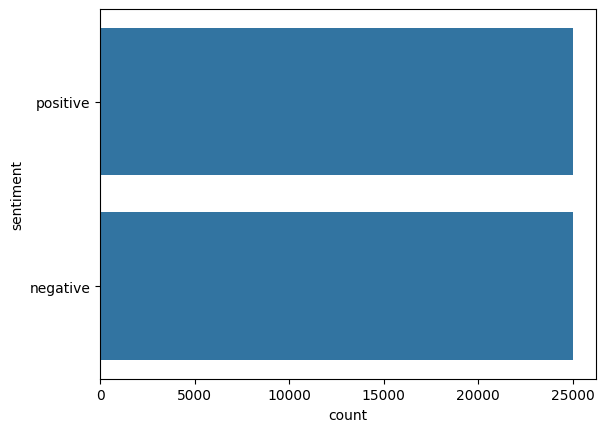

In [12]:
plt.figure()
sns.countplot(imdb_df['sentiment'])
plt.show()

## Usando el `opinion_lexicon` de NLTK

In [4]:
opinion_lexicon.positive()

['a+', 'abound', 'abounds', 'abundance', 'abundant', ...]

In [5]:
opinion_lexicon.negative()

['2-faced', '2-faces', 'abnormal', 'abolish', ...]

In [6]:
positive_dict = {x: 1 for x in opinion_lexicon.positive()}
negative_dict = {x: -1 for x in opinion_lexicon.negative()}

nltk_polarities = defaultdict(int)
nltk_polarities.update(positive_dict)
nltk_polarities.update(negative_dict)

In [7]:
nltk_pols = []

for idx in imdb_df.index.to_list():
    text = imdb_df.loc[idx,'review']
    values = [nltk_polarities[x] for x in word_tokenize(text)]
    nltk_pols.append(np.sum(values))

y_pred = [1 if x >= 0 else 0 for x in nltk_pols]
y_true = LabelEncoder().fit_transform(imdb_df['sentiment'].values)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.63      0.69     25000
           1       0.69      0.81      0.74     25000

    accuracy                           0.72     50000
   macro avg       0.73      0.72      0.72     50000
weighted avg       0.73      0.72      0.72     50000



Veamos algunas predicciones

In [13]:
imdb_df['nltk_polarities'] = nltk_pols
imdb_df.sample(10)

,review,sentiment,nltk_polarities
43279,I have always been keen on watching Hong Kong ...,positive,6
10364,Absolutely fantastic trash....this one has it ...,positive,3
42906,Lemuel Gulliver (Ted Danson) is a doctor who g...,positive,19
40949,Old movie buffs will know why I'd call this on...,positive,3
13713,This movie was by far the best ever... I think...,negative,6
39091,This film actually manages to be mindless enjo...,negative,-6
38097,If you want an undemanding and reasonably amus...,negative,-3
33763,This was truly the most painful experience I h...,negative,-7
36859,What bird is that ? A maltese falcon. The only...,negative,-6
6741,"During the War for Southern Independence, GENE...",positive,7


## Usando MPQA

Así se ven las polaridades de las palabras, usando preprocesamiento para mostrar el diccionario como un dataframe.

In [14]:
mpqa_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Data/MPQA_values.csv')
mpqa_df[['word','value']]

,word,value
0,abandoned,negative
1,abandonment,negative
2,abandon,negative
3,abase,negative
4,abasement,negative
...,...,...
8217,zealot,negative
8218,zealous,negative
8219,zealously,negative
8220,zenith,positive


In [ ]:
from collections import defaultdict
from nltk import word_tokenize
import numpy as np

pols = []

polarities = defaultdict(int)

mpqa_dict = {mpqa_df.iloc[idx]['word']: mpqa_df.iloc[idx]['polarity'] for idx in mpqa_df.index.to_list()}
polarities.update(mpqa_dict)

for idx in imdb_df.index.to_list():
    text = imdb_df.loc[idx,'review']
    values = [polarities[x] for x in word_tokenize(text)]
    pols.append(np.sum(values))

imdb_df['polarities'] = pols
imdb_df

,review,sentiment,polarities
0,One of the other reviewers has mentioned that ...,positive,-9
1,A wonderful little production. <br /><br />The...,positive,5
2,I thought this was a wonderful way to spend ti...,positive,6
3,Basically there's a family where a little boy ...,negative,-2
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,9
...,...,...,...
49995,I thought this movie did a down right good job...,positive,15
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,-7
49997,I am a Catholic taught in parochial elementary...,negative,-4
49998,I'm going to have to disagree with the previou...,negative,-7


In [ ]:
from sklearn.preprocessing import LabelEncoder

y_pred = imdb_df['polarities'].apply(lambda x: 1 if x >= 0 else 0).values
y_true = LabelEncoder().fit_transform(imdb_df['sentiment'].values)

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.49      0.59     25000
           1       0.62      0.83      0.71     25000

    accuracy                           0.66     50000
   macro avg       0.68      0.66      0.65     50000
weighted avg       0.68      0.66      0.65     50000

